Importación de librerías iniciales

In [3]:
# Importaciones de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import re
import plotly.express as px
import seaborn as sns
from collections import namedtuple
import scipy.stats as stats
import warnings
import sklearn.impute as skl_imp


Importación del dataset

In [4]:
# Importo el df earthquake
df = pd.read_csv('/Users/inesmurcortes/Documents/GitHub/Eathquake/earthquake.csv')

CAP II: Análisis Descriptivo

In [5]:
df.head(10)

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,dmin,...,Updated,Unnamed: 14,Type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-17T09:37:34.868Z,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615,6.1,mww,119.0,51.0,2.988,...,2023-02-17T17:58:24.040Z,NaN,earthquake,6.41,5.595,0.065,23.0,reviewed,us,us
1,2023-02-16T05:37:05.138Z,"7 km SW of Port-Olry, Vanuatu",-15.0912,167.0294,36.029,5.6,mww,81.0,26.0,0.392,...,2023-02-17T05:41:32.448Z,NaN,earthquake,5.99,6.080,0.073,18.0,reviewed,us,us
2,2023-02-15T18:10:10.060Z,"Masbate region, Philippines",12.3238,123.8662,20.088,6.1,mww,148.0,47.0,5.487,...,2023-02-16T20:12:32.595Z,NaN,earthquake,8.61,4.399,0.037,71.0,reviewed,us,us
3,2023-02-15T06:38:09.034Z,"54 km WNW of Otaki, New Zealand",-40.5465,174.5709,74.320,5.7,mww,81.0,40.0,0.768,...,2023-02-16T06:42:09.738Z,NaN,earthquake,3.68,4.922,0.065,23.0,reviewed,us,us
4,2023-02-14T13:16:51.072Z,"2 km NW of Lele?ti, Romania",45.1126,23.1781,10.000,5.6,mww,132.0,28.0,1.197,...,2023-02-17T09:15:18.586Z,NaN,earthquake,4.85,1.794,0.032,95.0,reviewed,us,us
5,2023-02-13T09:18:07.995Z,"Kermadec Islands, New Zealand",-29.5218,-177.9727,374.033,6.1,mww,47.0,178.0,0.263,...,2023-02-14T09:20:59.238Z,NaN,earthquake,15.39,5.630,0.093,11.0,reviewed,us,us
6,2023-02-11T15:31:26.464Z,Tristan da Cunha region,-35.3341,-15.6399,10.000,5.6,mww,55.0,84.0,21.230,...,2023-02-12T15:34:52.841Z,NaN,earthquake,8.13,1.789,0.073,18.0,reviewed,us,us
7,2023-02-11T08:55:07.845Z,NaN,3.6213,126.6944,48.780,5.9,mww,130.0,37.0,2.909,...,2023-02-12T08:58:20.552Z,NaN,earthquake,2.62,5.729,0.054,33.0,reviewed,us,us
8,2023-02-09T21:12:19.743Z,Carlsberg Ridge,-1.2376,67.5366,10.000,5.5,mww,53.0,50.0,5.722,...,2023-02-14T14:31:35.223Z,NaN,earthquake,5.45,1.884,0.062,25.0,reviewed,us,us
9,2023-02-09T10:53:17.268Z,"45 km SW of Kirakira, Solomon Islands",-10.7636,161.6440,35.000,5.5,mww,86.0,31.0,2.127,...,2023-02-10T10:56:36.462Z,NaN,earthquake,8.17,1.817,0.065,23.0,reviewed,us,us


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37331 entries, 0 to 37330
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             37331 non-null  object 
 1   Place            37047 non-null  object 
 2   Latitude         37331 non-null  float64
 3   Longitude        37331 non-null  float64
 4   Depth            37197 non-null  float64
 5   Mag              37331 non-null  float64
 6   MagType          37331 non-null  object 
 7   nst              7473 non-null   float64
 8   gap              10087 non-null  float64
 9   dmin             4395 non-null   float64
 10  rms              20218 non-null  float64
 11  net              37331 non-null  object 
 12  ID               37331 non-null  object 
 13  Updated          37331 non-null  object 
 14  Unnamed: 14      0 non-null      float64
 15  Type             37331 non-null  object 
 16  horizontalError  3970 non-null   float64
 17  depthError  

In [7]:
# Análisis de número de valores únicos
df.nunique()

Time               37331
Place              25800
Latitude           31722
Longitude          33478
Depth               4168
Mag                  264
MagType               18
nst                  734
gap                 1160
dmin                3376
rms                  198
net                   16
ID                 37331
Updated            36991
Unnamed: 14            0
Type                   4
horizontalError      453
depthError           756
magError             235
magNst               289
status                 2
locationSource        54
magSource             54
dtype: int64

In [8]:
# A raíz de ver los tipos de variables y el número de valores únicos, vamos a corregir las clases que son numéricas/strings y podrían ser categóricas. 
# Lista de columnas con menos de 20 valores distintos
to_factor = list(df.loc[:,df.nunique() < 20]);  

# Transformación de variables a tipo categórico
df[to_factor] = df[to_factor].astype('category')

print(f'Columnas transformadas: {to_factor}')


Columnas transformadas: ['MagType', 'net', 'Unnamed: 14', 'Type', 'status']


In [9]:
# Descripción de valores no numéricos
df.describe(exclude=np.number)

,Time,Place,MagType,net,ID,Updated,Unnamed: 14,Type,status,locationSource,magSource
count,37331,37047,37331,37331,37331,37331,0,37331,37331,37331,37331
unique,37331,25800,18,16,37331,36991,0,4,2,54,54
top,2023-02-17T09:37:34.868Z,South Sandwich Islands region,mw,us,us6000jpl7,2018-06-04T20:43:44.000Z,NaN,earthquake,reviewed,us,us
freq,1,664,18700,23364,1,143,NaN,37080,37317,23069,13264


In [10]:
# Descripción de valores numéricos
df.describe()

,Latitude,Longitude,Depth,Mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,37331.000000,37331.000000,37197.000000,37331.000000,7473.000000,10087.000000,4395.000000,20218.000000,3970.000000,20827.000000,16551.000000,5372.000000
mean,5.457651,38.877695,58.583346,5.948616,265.481065,45.014891,4.315178,1.000779,7.324982,10.679092,0.261882,46.974870
std,30.789822,123.090934,109.563400,0.455160,161.982149,34.311032,5.480411,0.356822,5.400729,10.660510,0.169566,60.441745
min,-77.080000,-179.997000,-4.000000,5.500000,0.000000,8.000000,0.004505,0.005000,0.085000,0.000000,0.000000,0.000000
25%,-16.519800,-75.807000,15.000000,5.600000,134.000000,24.100000,1.155000,0.890000,5.700000,3.600000,0.200000,17.000000
50%,1.153000,98.577000,28.500000,5.800000,241.000000,36.000000,2.509000,1.000000,7.100000,6.100000,0.200000,31.000000
75%,33.786000,143.347850,41.000000,6.140000,372.000000,54.800000,5.127500,1.110000,8.500000,16.200000,0.330000,55.000000
max,87.199000,180.000000,700.000000,9.500000,934.000000,360.000000,39.730000,42.410000,99.000000,569.200000,1.840000,941.000000


In [11]:
# Otra de las variables que no aporta mucha información directamente es Time, ya que es un string con formato YYYY-MM-DDT00:00:00.000Z. 
# Vamos a extraer sus características y almacenarlas en diferentes columnas
# En primer lugar, comprobamos que no hay errores de formato y que los 37K registros siguen el mismo patrón

regex_3 = r'^\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}\.\d{3}Z$'

ls = []
for index, row in df.iterrows():
    if not re.match(regex_3, row['Time']):
        ls.append(row['Time'])

ls

# Devuelve una lista vacía, por lo que procedemos a extraer el año, mes, día, hora de cada evento sísmico.

# Creamos 4 patrones regex para año, día, mes y hora del seísmo
regex_year = r'^(\d{4})-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}\.\d{3}Z$'
regex_month = r'^\d{4}-(\d{2})-\d{2}T\d{2}:\d{2}:\d{2}\.\d{3}Z$'
regex_day = r'^\d{4}-\d{2}-(\d{2})T\d{2}:\d{2}:\d{2}\.\d{3}Z$'
regex_hour = r'^\d{4}-\d{2}-\d{2}T(\d{2}):\d{2}:\d{2}\.\d{3}Z$'

# Extraemos la información en nuevas columnas del df
df['year'] = df['Time'].str.extract(regex_year)
df['month']= df['Time'].str.extract(regex_month)
df['day']= df['Time'].str.extract(regex_day)
df['hour']= df['Time'].str.extract(regex_hour)



In [12]:
# Juntamos la infomración anterior en una única columna de tipo datetime
df['date_earthquake'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str) + ' ' + df['hour'].astype(str))
df.drop(columns= ['year', 'month', 'day', 'hour'], inplace=True)

In [13]:
# Hacemos el mismo proceso ahora para la columna 'Updated'
df['year'] = df['Updated'].str.extract(regex_year)
df['month']= df['Updated'].str.extract(regex_month)
df['day']= df['Updated'].str.extract(regex_day)
df['hour']= df['Updated'].str.extract(regex_hour)


In [14]:
# Juntamos la información en una única columna
df['date_updated'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str) + ' ' + df['hour'].astype(str))
df.drop(columns= ['year', 'month', 'day', 'hour'], inplace=True)

In [15]:
# Otra variable que no presenta información interesante para analizar es el string Place. Extraigo el valor del país donde se originan los seísmos.
# Obtención del string País, que guardo en una nueva columna llamada "country"

regex_1 = r'([^,]+)$'
df['country'] = None

# Loop de búsqueda con el patrón regex 
for index, row in df.iterrows():
    if pd.notna(row['Place']):
        match = re.search(regex_1, row['Place'])
        # Check if a match is found and extract the result
        if match:
            country = match.group(1)
            df.at[index, 'country'] = country
        else:
            df.at[index, 'country'] = None
    else:
        df.at[index, 'country'] = None

In [16]:
# Tras estudiar los valores únicos que devuelve, veo que hay palabras que hacen referencia a la ubicación del país. Decido eliminarlas para homogeneizar los resultados
# Defino lista de palabras a eliminar
words_ls = ['near', 'off', 'the', 'coast', 'of', 'border', 'region', 'central', 'southeast', 'southern', 'eastern', 'east', 'East', 'nothwestern', 'northeastern', 'western', 'southwest', 'south', 'South', 'north', 'North', 'Northern', 'west', 'western', 'West', 'northwest', 'southwest', 'southwest', 'southwestern'] 

# Patrón regex sobre la lista de palabras definidas previamente
regex_2 = r'(?i)' + '|'.join(re.escape(word) for word in words_ls)

# Aplico patrón regex a la columna country
df['country'] = df['country'].str.replace(regex_2, '')

# Strip para eliminar espacios innecesarios
df['country'] = df['country'].str.strip()



/var/folders/5f/2dk901xj21s3s5n6xmmn06v40000gn/T/ipykernel_2163/1213402536.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['country'] = df['country'].str.replace(regex_2, '')


In [17]:
# Hago un drop de las variables Time y Place originales
df.drop(columns = ['Time', 'Place', 'Updated'], inplace =True)

In [18]:
# También hago un drop de columnas que no ofrecen ningún tipo de valor informativo útil. 
# Unnamed:14 -> Columna de valores nulos. 
# ID -> Identificador único no numérico que representa una combinación de números y letras. Se sustituirá por el índice del DF.

df.drop(columns=['Unnamed: 14', 'ID'], inplace=True)

Plotting categorical column: MagType


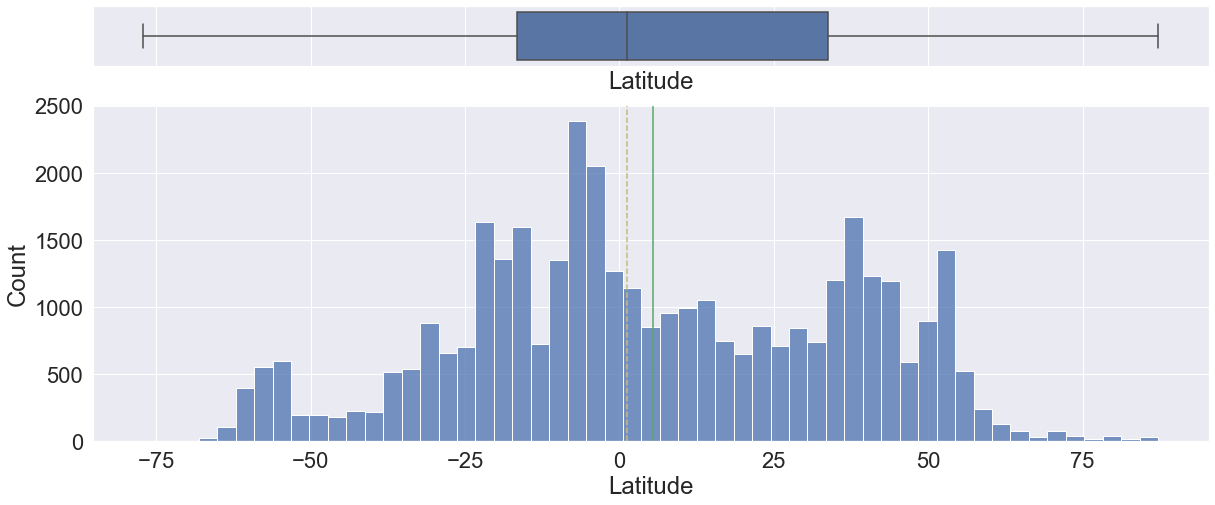

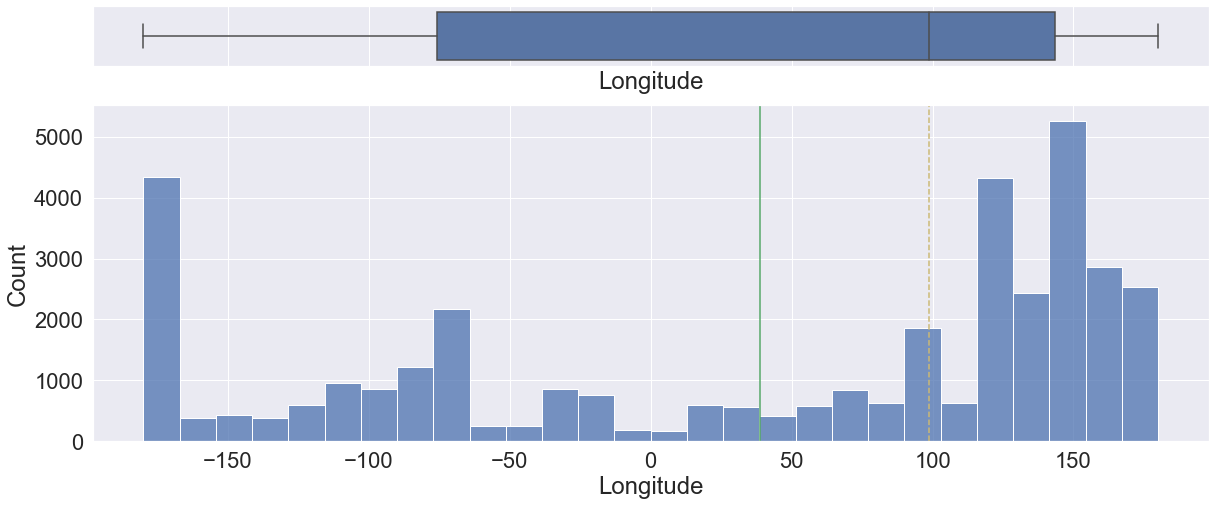

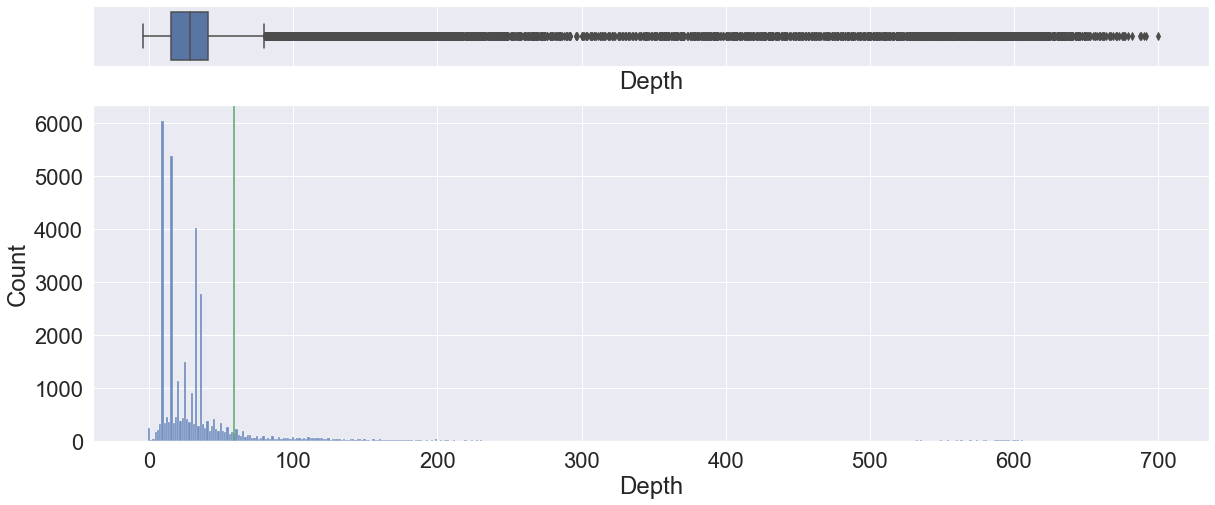

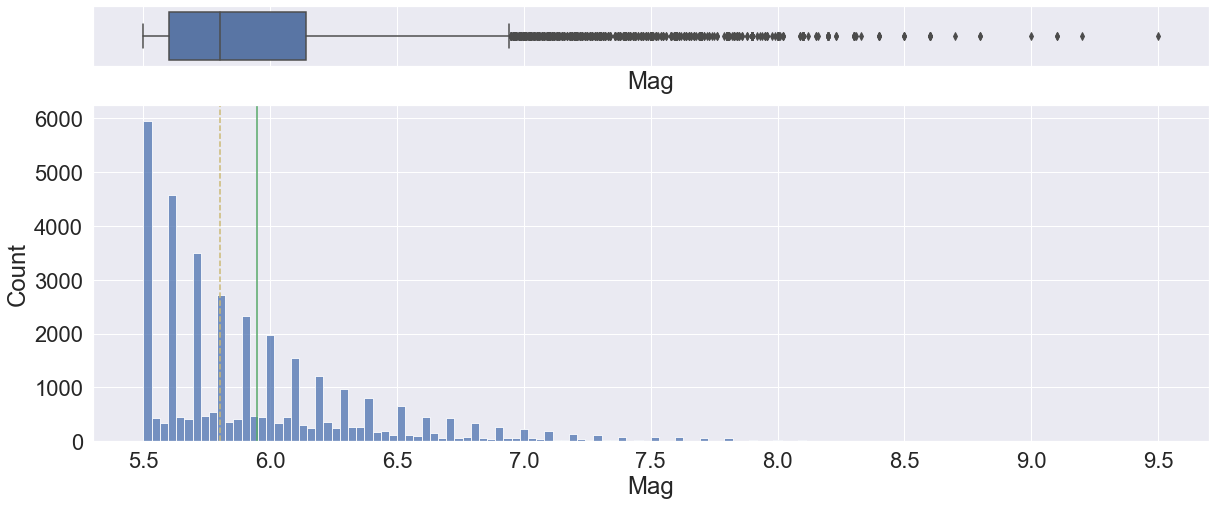

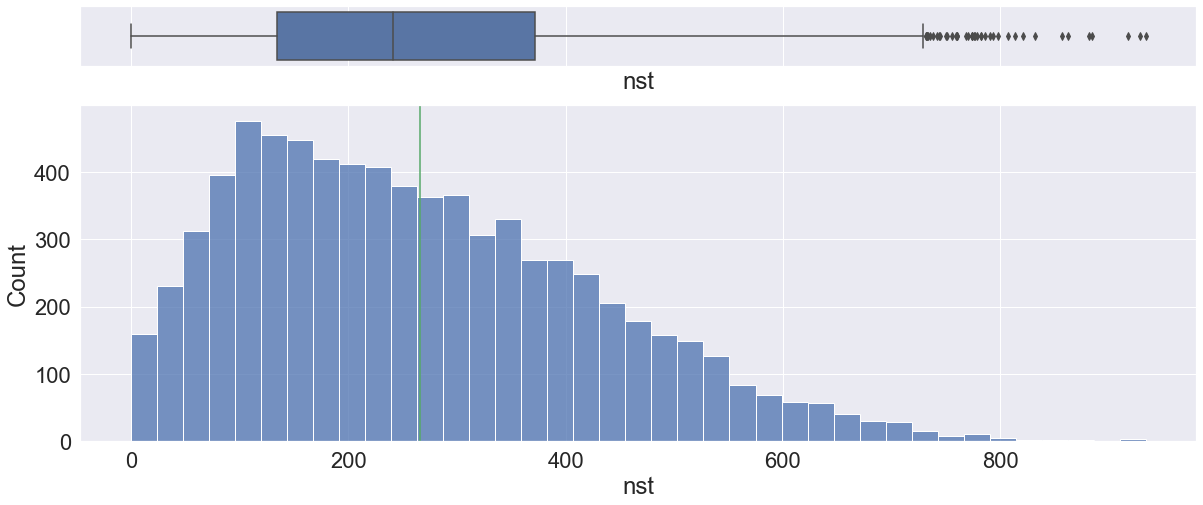

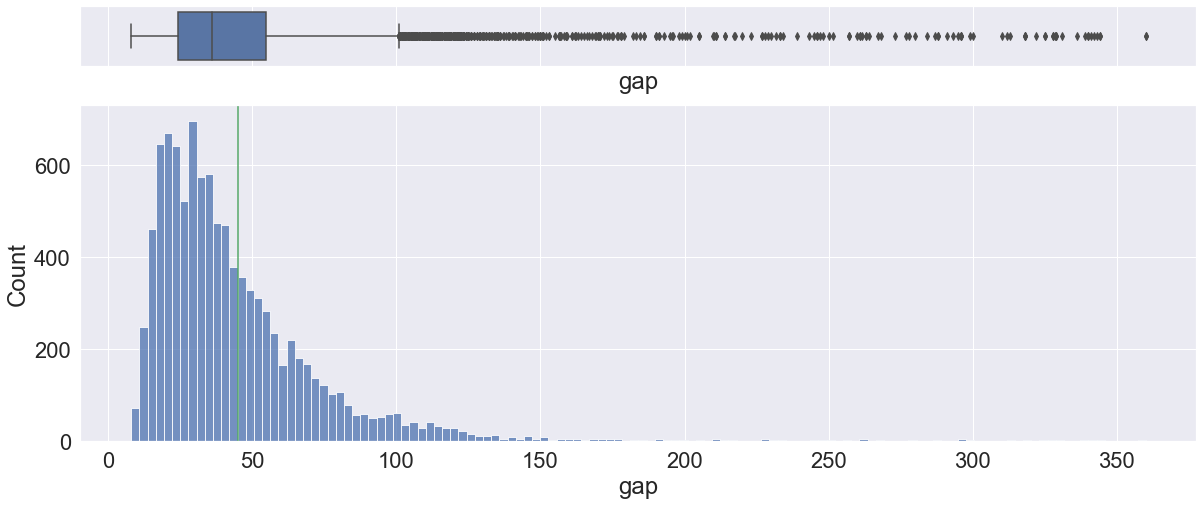

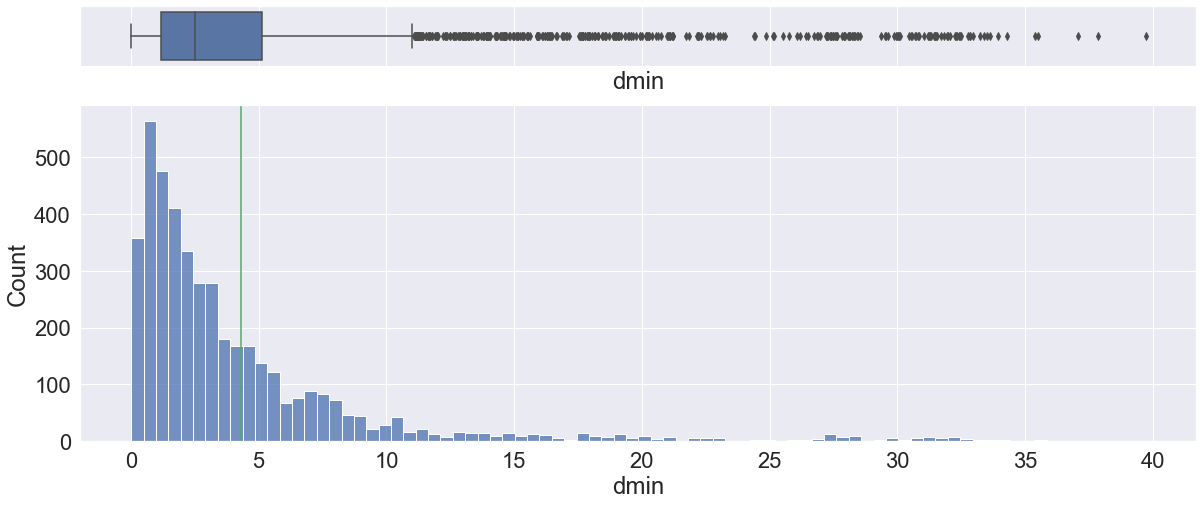

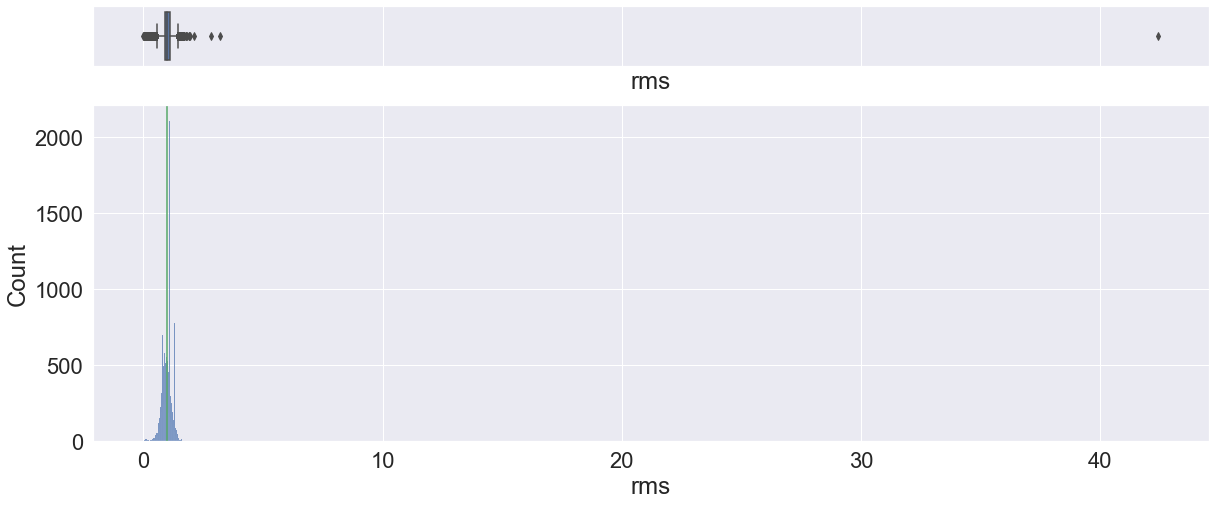

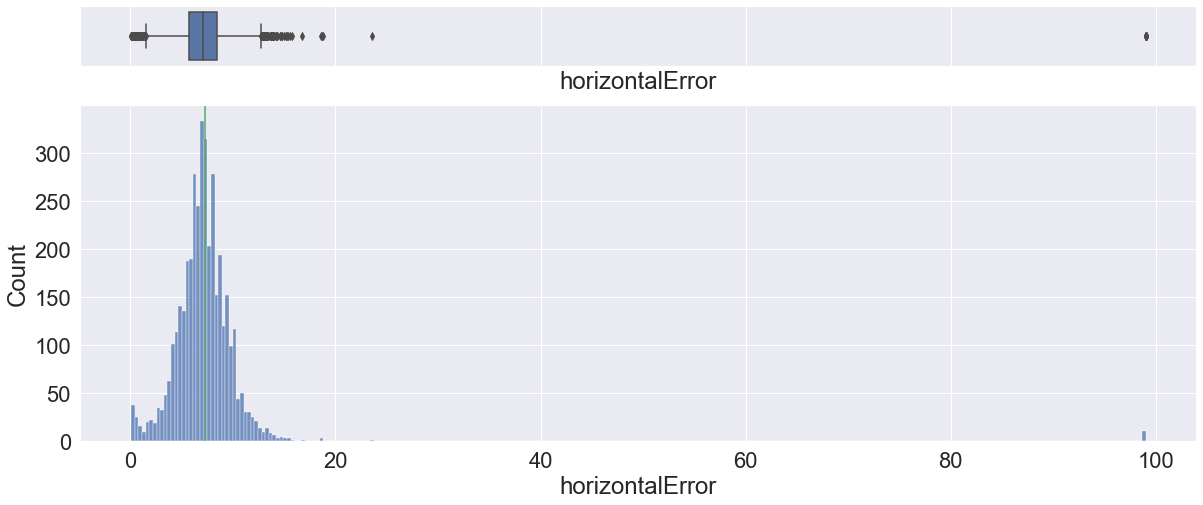

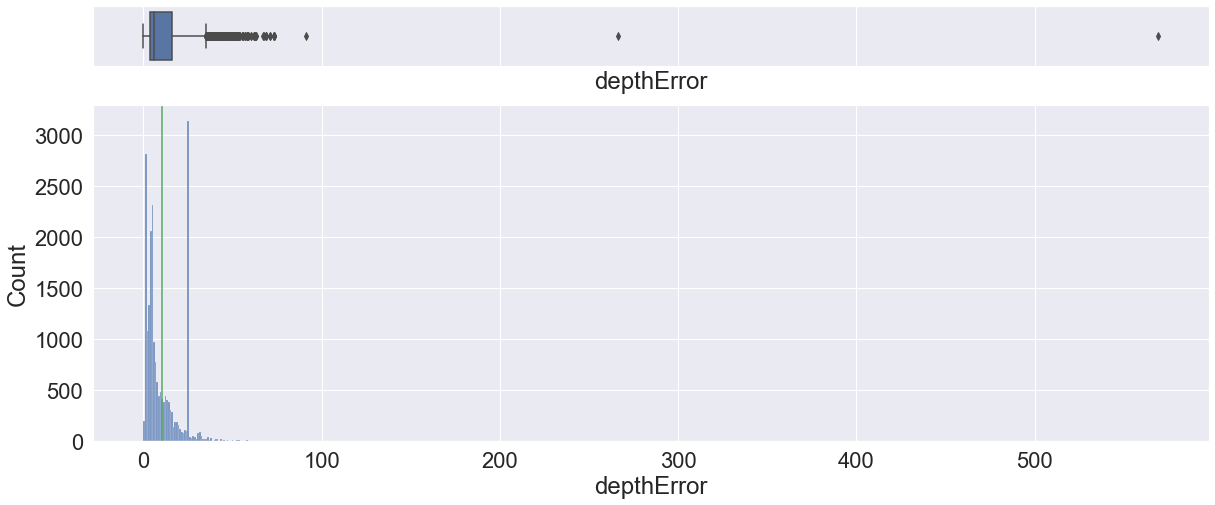

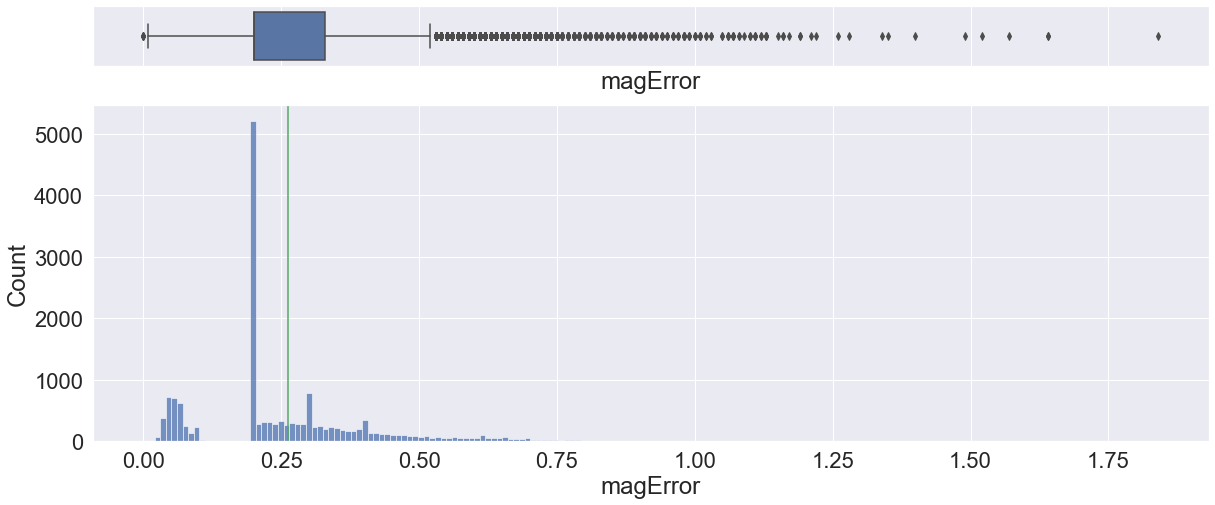

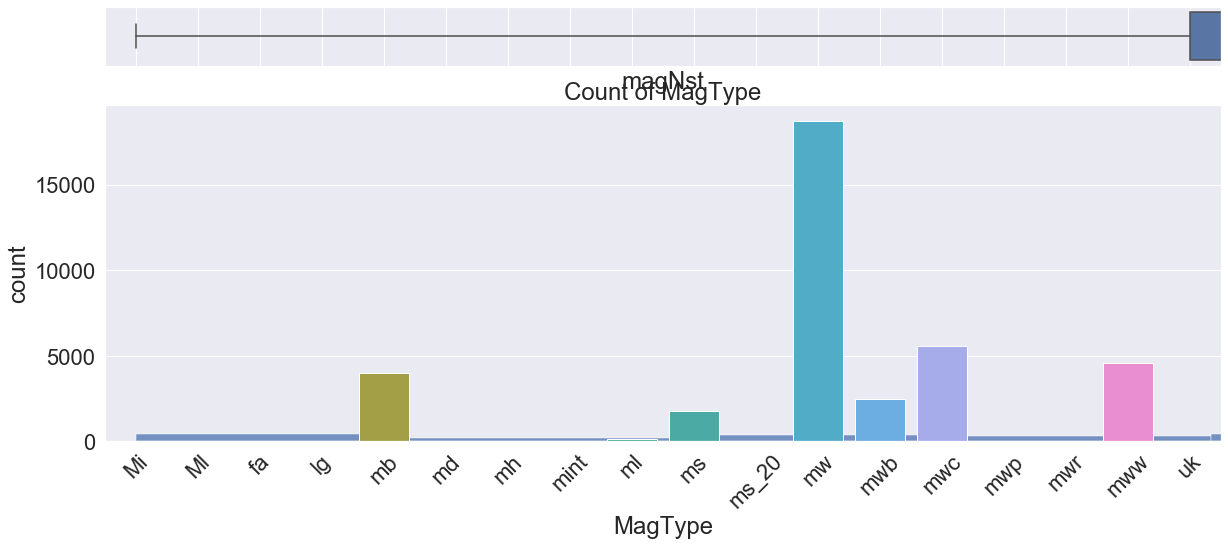

Plotting categorical column: net


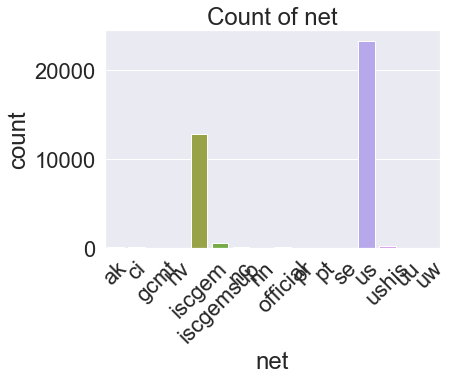

Plotting categorical column: Type


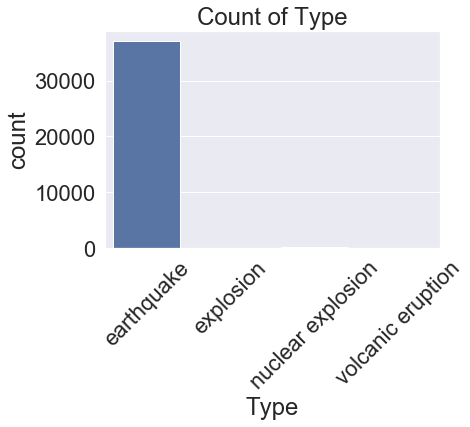

Plotting categorical column: status


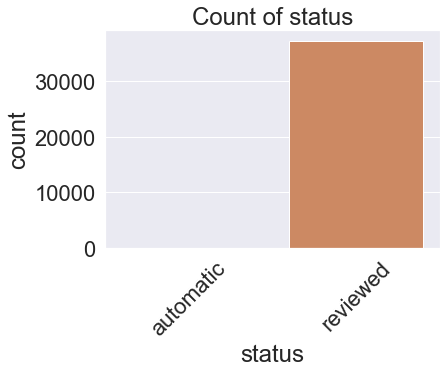

Plotting categorical column: locationSource


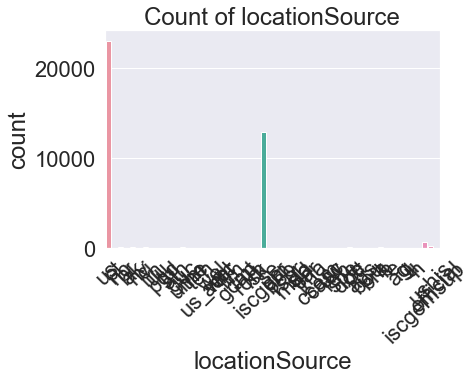

Plotting categorical column: magSource


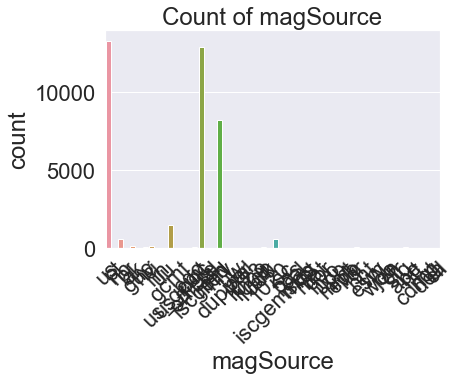

Plotting categorical column: country


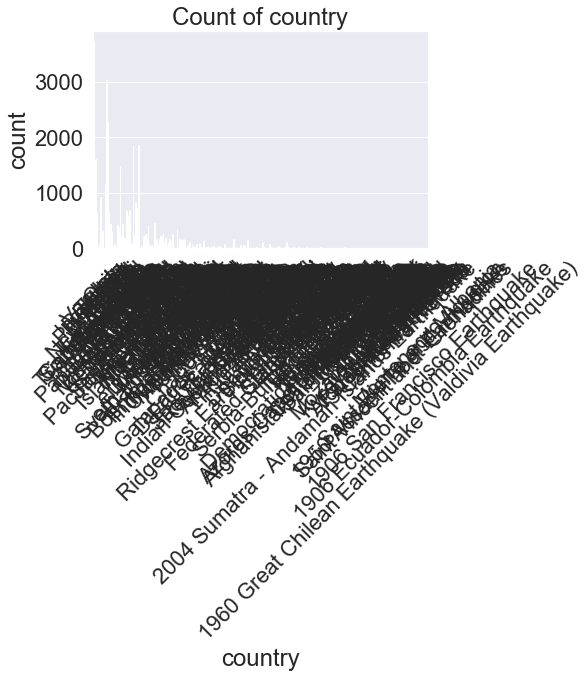

In [19]:
# Inspección gráfica de las variables

import seaborn as sns
import matplotlib.pyplot as plt

def histogram_boxplot(data, xlabel = None, title = None, font_scale=2, figsize=(20,10), bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)

    example use: histogram_boxplot(np.random.rand(100), bins = 20, title="Fancy plot")
    """
    figsize = 20,8
    # Definir tamaño letra
    sns.set(font_scale=font_scale)
    # Crear ventana para los subgráficos
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    # Crear boxplot
    sns.boxplot(x=data, ax=ax_box2)
    # Crear histograma
    sns.histplot(x=data, ax=ax_hist2, bins=bins) if bins else sns.histplot(x=data, ax=ax_hist2)
    # Pintar una línea con la media
    ax_hist2.axvline(np.mean(data),color='g',linestyle='-')
    # Pintar una línea con la mediana
    ax_hist2.axvline(np.median(data),color='y',linestyle='--')
    # Asignar título y nombre de eje si tal
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title, xlabel="")

def plot_categorical(col, figsize=(10,8)):
    print(f'Plotting categorical column: {col.name}')
    sns.countplot(x=col, data=df)
    plt.xlabel(col.name)
    plt.title(f'Count of {col.name}')
    plt.xticks(rotation=45)
    plt.show()

continuous_cols = df.select_dtypes(include=['int', 'float']).columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

# Plot continuous variables
for col in continuous_cols:
    histogram_boxplot(df[col])

# Plot categorical variables
for col in categorical_cols:
    plot_categorical(df[col])

In [20]:
# Como en este dataset no hay muchas variables categóricas y los gráficos son demasiado densos como para entenderlos a simple vista, voy a adaptar los gráficos para cada variable

# MagType
top_10 = df['MagType'].value_counts().head(10)
top_10 = pd.DataFrame({'Type': top_10.index, 'Count': top_10.values})
fig = px.bar(top_10, x='Type', y='Count', title='MagTypes ( Top 10 )')
fig.show()

In [21]:
# net
top_10 = df['net'].value_counts().head(4)
top_10 = pd.DataFrame({'net': top_10.index, 'Count': top_10.values})
fig = px.bar(top_10, x='net', y='Count', title='net ( Top 3 )')
fig.show()

In [22]:
# type
top_10 = df['Type'].value_counts().head(3)
top_10 = pd.DataFrame({'Type': top_10.index, 'Count': top_10.values})
fig = px.bar(top_10, x='Type', y='Count', title='Type ( Top 3 )')
fig.show()

In [23]:
# country
top_10 = df['country'].value_counts().head(10)
top_10 = pd.DataFrame({'country': top_10.index, 'Count': top_10.values})
fig = px.bar(top_10, x='country', y='Count', title='country ( Top 10 )')
fig.show()

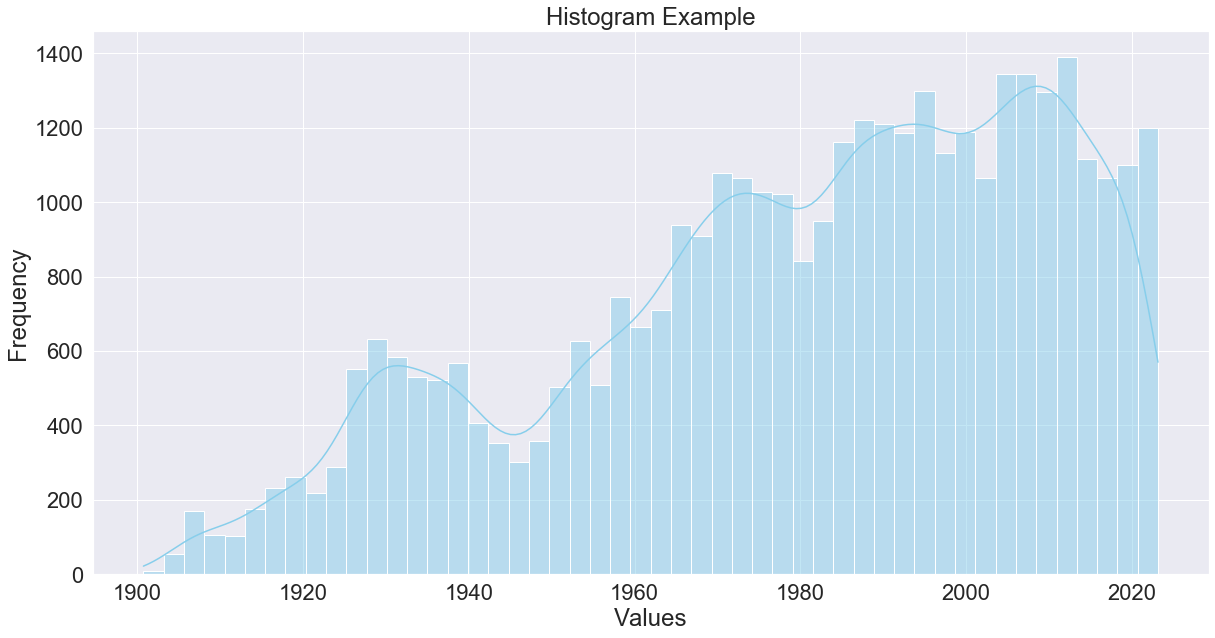

In [24]:
plt.figure(figsize=(20, 10))  

# Plot
sns.histplot(df['date_earthquake'], bins=50, kde=True, color='skyblue')  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Example')

plt.show()

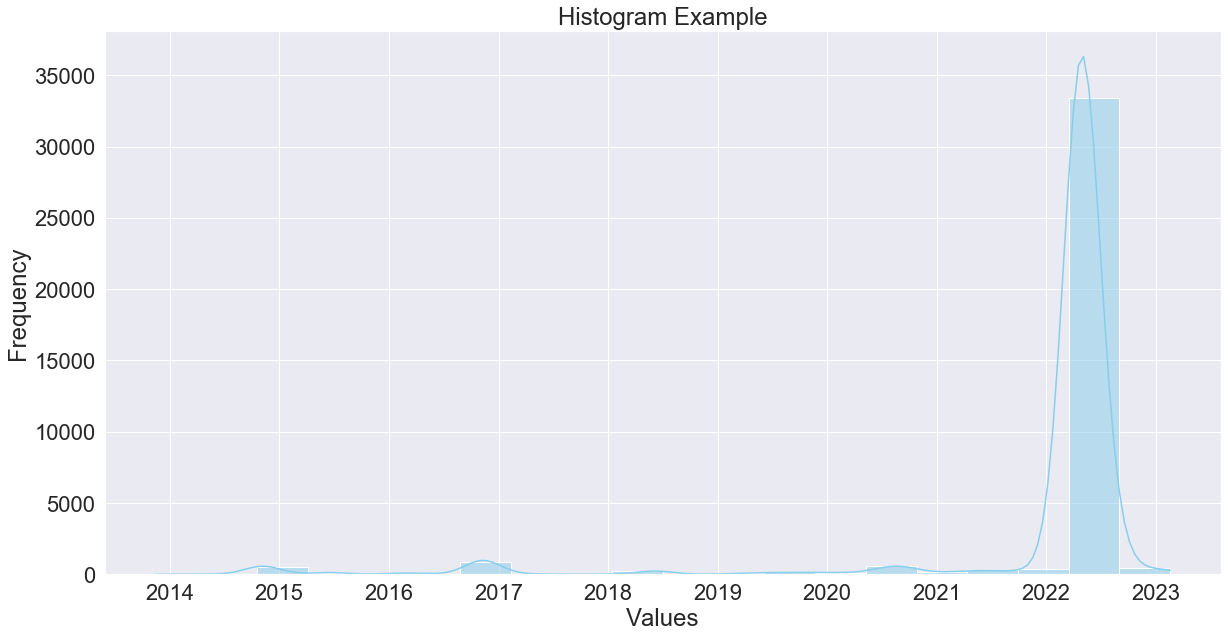

In [25]:
plt.figure(figsize=(20, 10))  

# Plot
sns.histplot(df['date_updated'], bins=20, kde=True, color='skyblue')  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Example')

plt.show()

In [26]:
# type
top_10 = df['Type'].value_counts().head(3)
top_10 = pd.DataFrame({'Type': top_10.index, 'Count': top_10.values})
fig = px.bar(top_10, x='Type', y='Count', title='Type ( Top 3 )')
fig.show()

In [27]:
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color="Mag", 
                        mapbox_style="open-street-map", zoom = 1, color_continuous_scale = 'Reds')
fig.show()

In [28]:
# Complementamos el análisis visual con el valor numérico de la simetría
df.skew()

/var/folders/5f/2dk901xj21s3s5n6xmmn06v40000gn/T/ipykernel_2163/3491778496.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Latitude           -0.054264
Longitude          -0.591205
Depth               3.845282
Mag                 1.646315
nst                 0.647220
gap                 3.550854
dmin                2.956782
rms                77.245397
horizontalError    13.542217
depthError          8.600140
magError            1.504111
magNst              5.262359
dtype: float64

In [29]:
# Análisis de correlación de variables
df.corr()

,Latitude,Longitude,Depth,Mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
Latitude,1.000000,0.160449,-0.106645,0.037792,0.401307,0.042729,-0.405154,-0.095694,-0.136386,0.024599,0.108162,0.224685
Longitude,0.160449,1.000000,-0.069279,0.037964,0.047136,-0.266335,-0.152766,-0.008069,-0.079377,0.031249,0.067836,0.045962
Depth,-0.106645,-0.069279,1.000000,-0.004719,0.175152,-0.170159,-0.075751,-0.052815,0.056835,-0.135945,-0.059200,0.004383
Mag,0.037792,0.037964,-0.004719,1.000000,0.416276,-0.210433,-0.106318,0.041513,-0.064015,0.105616,0.113593,0.048950
nst,0.401307,0.047136,0.175152,0.416276,1.000000,-0.418439,0.029894,-0.037641,-0.127042,-0.227013,-0.329893,0.716937
gap,0.042729,-0.266335,-0.170159,-0.210433,-0.418439,1.000000,0.021131,0.015204,0.250913,0.392768,0.346759,-0.142584
dmin,-0.405154,-0.152766,-0.075751,-0.106318,0.029894,0.021131,1.000000,-0.011300,0.231048,-0.080540,0.124969,-0.102402
rms,-0.095694,-0.008069,-0.052815,0.041513,-0.037641,0.015204,-0.011300,1.000000,0.279841,0.058025,-0.006200,-0.023896
horizontalError,-0.136386,-0.079377,0.056835,-0.064015,-0.127042,0.250913,0.231048,0.279841,1.000000,0.341467,0.312445,-0.049678
depthError,0.024599,0.031249,-0.135945,0.105616,-0.227013,0.392768,-0.080540,0.058025,0.341467,1.000000,0.255203,-0.038381


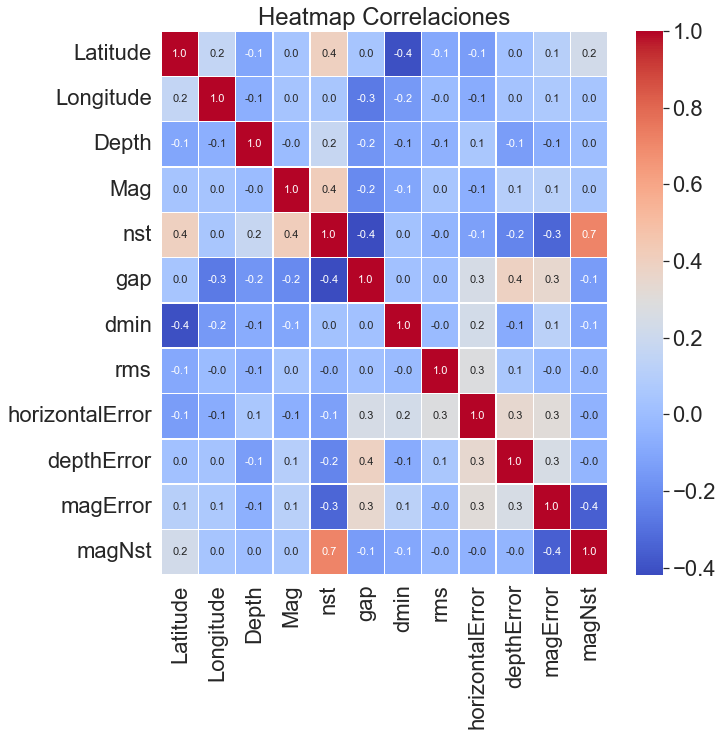

In [30]:
# Heatmap de correlaciones
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt='.1f', ax=ax, cmap='coolwarm', annot_kws={"size": 11})
plt.title("Heatmap Correlaciones")
plt.show()

**2. Valores atípicos** 

In [31]:
# Definición de función para winsorizar valores atípicos
def winsorize_with_pandas(s, limits):
    """
    s : pd.Series
        Series to winsorize
    limits : tuple of float
        Tuple of the percentages to cut on each side of the array, 
        with respect to the number of unmasked data, as floats between 0. and 1
    """
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'), 
                  upper=s.quantile(1-limits[1], interpolation='higher'))

                  ## Función para gestionar outliers
                  
def gestiona_outliers(col,clas = 'check'):
    
     print(col.name)
     # Condición de asimetría y aplicación de criterio 1 según el caso
     if abs(col.skew()) < 1:
        criterio1 = abs((col-col.mean())/col.std())>3
     else:
        criterio1 = abs((col-col.median())/col.mad())>8
     
     # Calcular primer cuartil     
     q1 = col.quantile(0.25)  
     # Calcular tercer cuartil  
     q3 = col.quantile(0.75)
     # Calculo de IQR
     IQR=q3-q1
     # Calcular criterio 2 (general para cualquier asimetría)
     criterio2 = (col<(q1 - 3*IQR))|(col>(q3 + 3*IQR))
     lower = col[criterio1&criterio2&(col<q1)].count()/col.dropna().count()
     upper = col[criterio1&criterio2&(col>q3)].count()/col.dropna().count()
     # Salida según el tipo deseado
     if clas == 'check':
            return(lower*100,upper*100,(lower+upper)*100)
     elif clas == 'miss':
            print('\n MissingAntes: ' + str(col.isna().sum()))
            col.loc[criterio1&criterio2] = np.nan
            print('MissingDespues: ' + str(col.isna().sum()) +'\n')
            return(col)

          
# Llamada en modo check
df.select_dtypes(include=np.number).copy().apply(lambda x: gestiona_outliers(x))

Latitude
Longitude
Depth
Mag
nst
gap
dmin
rms
horizontalError
depthError
magError
magNst


,Latitude,Longitude,Depth,Mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,3.099712,0.034824,0.0,0.763359,0.978385,0.014838,0.277078,0.048015,0.090629,0.837677
2,0.0,0.0,3.099712,0.034824,0.0,0.763359,0.978385,0.014838,0.277078,0.048015,0.090629,0.837677


In [32]:
# Voy a pasar a NA el único valor que creo que puede tratarse de un error:
df.rms[df.rms>4] = np.nan

/var/folders/5f/2dk901xj21s3s5n6xmmn06v40000gn/T/ipykernel_2163/2648705434.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
# Defino función de winsorización
def winsor_perc(df, cols, perc_low, perc_high):
    
    for col in cols:
        
         lower_bound = df[col].quantile(perc_low)
         upper_bound = df[col].quantile(1-perc_high)
        
         df[col] = np.where(df[col]>upper_bound, upper_bound,
                  np.where(df[col]<lower_bound, lower_bound, df[col]))

In [34]:
# Defino las columnas a winsorizar (Dejo fuera lat, lon y nst al no tener outliers)
cols_winsor = ['Depth','Mag','gap','dmin','rms','horizontalError','depthError','magError','magNst']

# Ejecuto la winsorización
df_cont2 = df.select_dtypes(include=np.number).copy()
winsor_perc(df_cont2, cols_winsor , 0.01, 0.01)

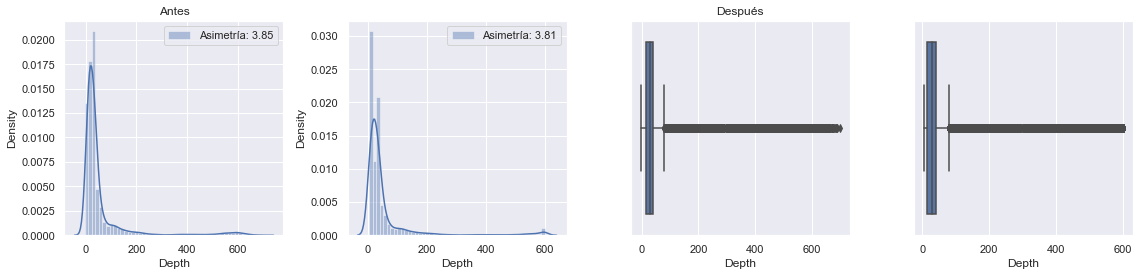

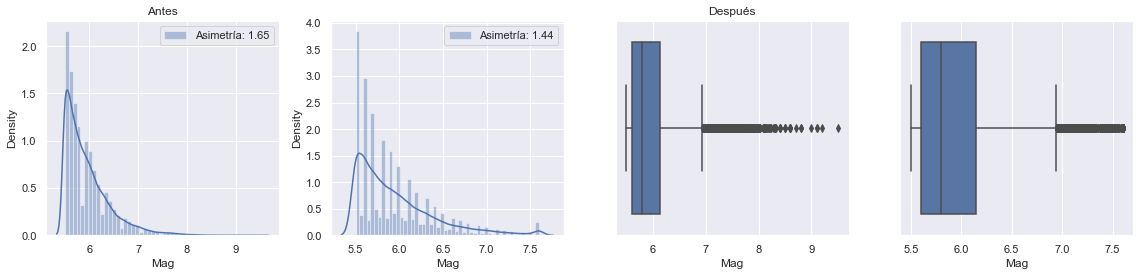

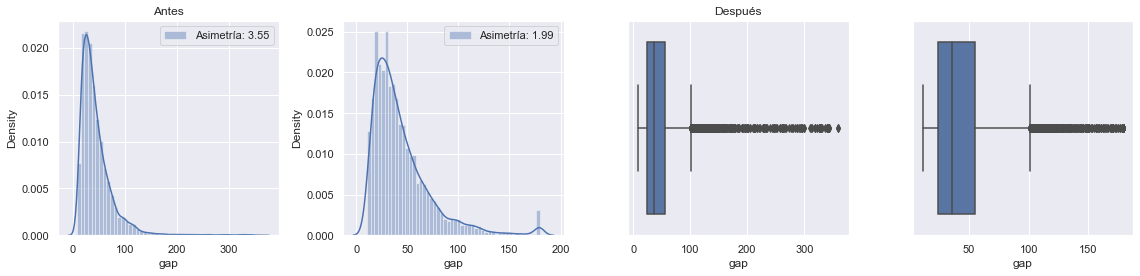

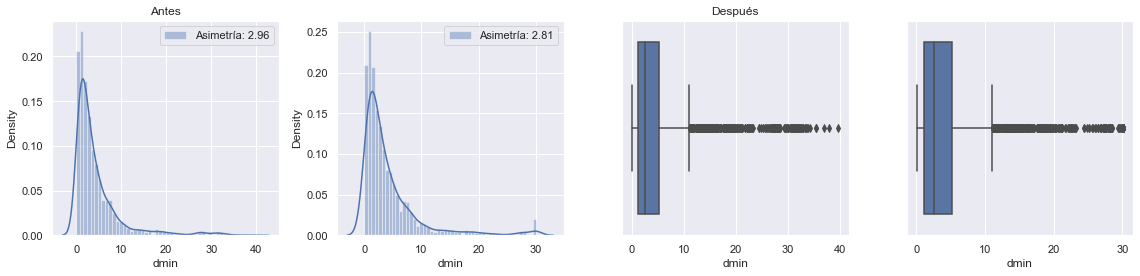

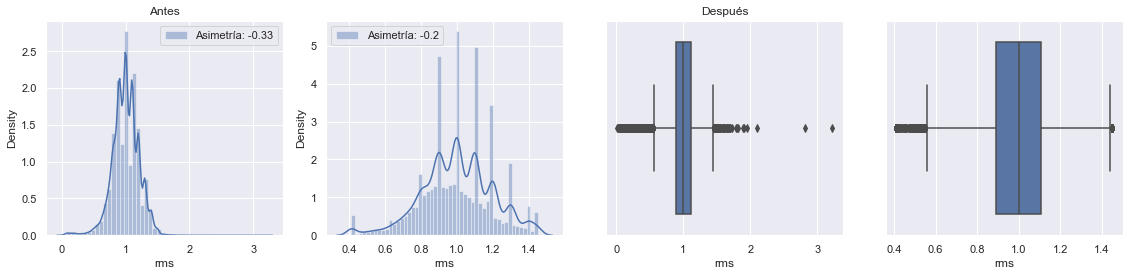

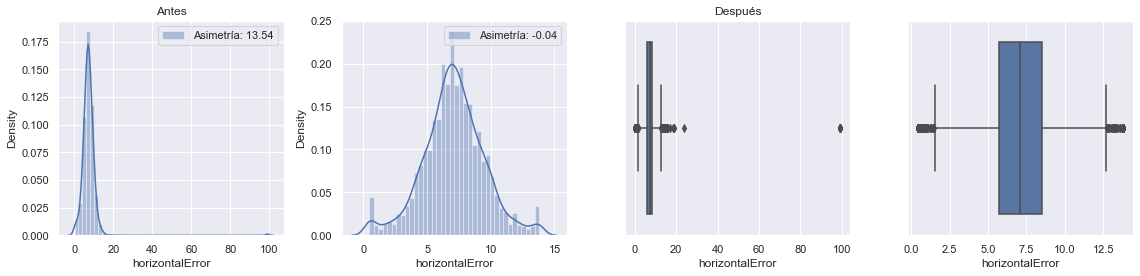

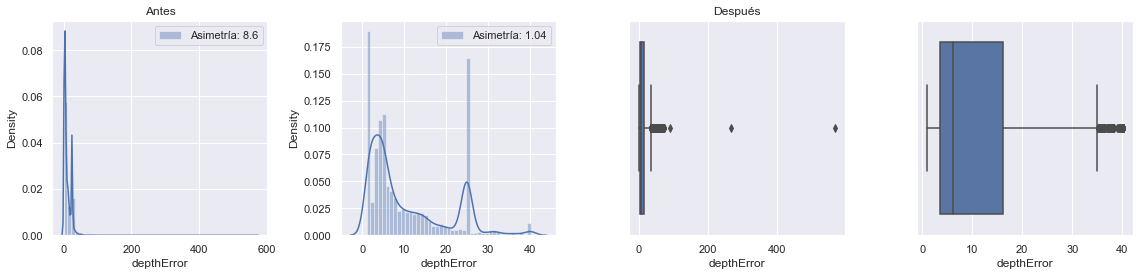

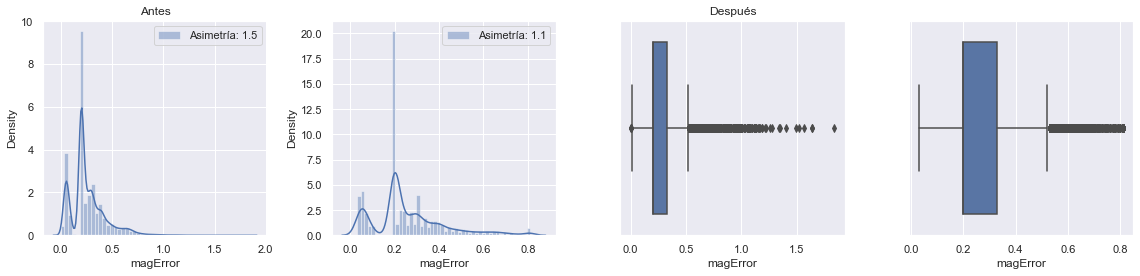

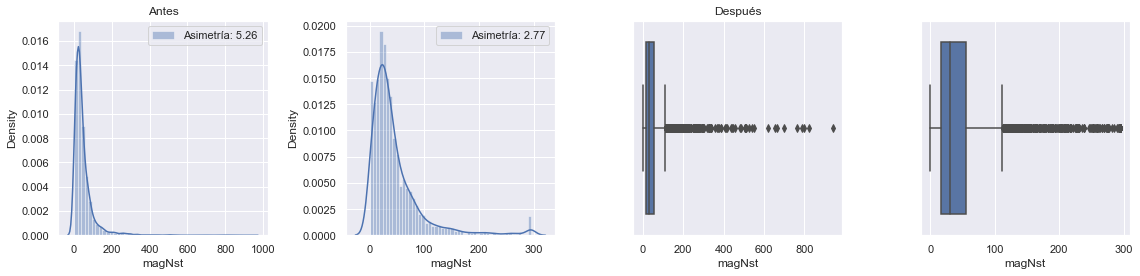

In [35]:
warnings.filterwarnings("ignore")

sns.set()

# Plot de gráficos 
for col in cols_winsor:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="Asimetría: " + str(np.round(df[col].skew(),2)))
    plt.title('Antes')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cont2[col], label="Asimetría: " + str(np.round(df_cont2[col].skew(),2)))
    plt.title(' ')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Después')
    
    plt.subplot(144)
    sns.boxplot(df_cont2[col])
    plt.title(' ')
    plt.tight_layout()
    plt.show()

In [36]:
# Volvemos a observar ahora la incidencia de outliers.
df_cont2.select_dtypes(include=np.number).copy().apply(lambda x: gestiona_outliers(x))

Latitude
Longitude
Depth
Mag
nst
gap
dmin
rms
horizontalError
depthError
magError
magNst


,Latitude,Longitude,Depth,Mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,3.123908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.098287
2,0.0,0.0,3.123908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.098287


In [37]:
df_cat = df.select_dtypes(exclude=np.number)
df_winsor = df_cat.join(df_cont2)

**3. Valores perdidos**

In [38]:
# Creo un DF para analizar el impacto de los missings
ms = df_winsor.isna().sum()
ms

MagType                0
net                    0
Type                   0
status                 0
locationSource         0
magSource              0
date_earthquake        0
date_updated           0
country              284
Latitude               0
Longitude              0
Depth                134
Mag                    0
nst                29858
gap                27244
dmin               32936
rms                17114
horizontalError    33361
depthError         16504
magError           20780
magNst             31959
dtype: int64

In [39]:
# Aíslo aquellas columnas afectadas por valores nulos, de forma que podamos entender mejor su incidencia.
ms_graf = ms[ms>0]

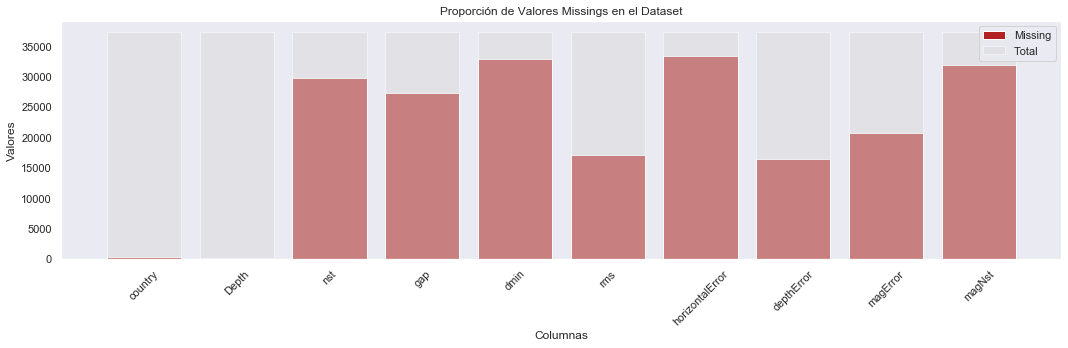

In [40]:
# Plot de datos missing

plt.figure(figsize=(15, 5))  # Set the figure size

# Barra valores missings
plt.bar(ms_graf.index, ms_graf.values, color='firebrick', label='Missing')

# Barrra valores totales
total_rows = len(df)
plt.bar(ms_graf.index, [total_rows] * len(ms_graf), color='gainsboro', alpha=0.5, label='Total')

plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.title('Proporción de Valores Missings en el Dataset')
plt.legend()
plt.xticks(rotation=45)
plt.grid(False)


plt.tight_layout()
plt.show()

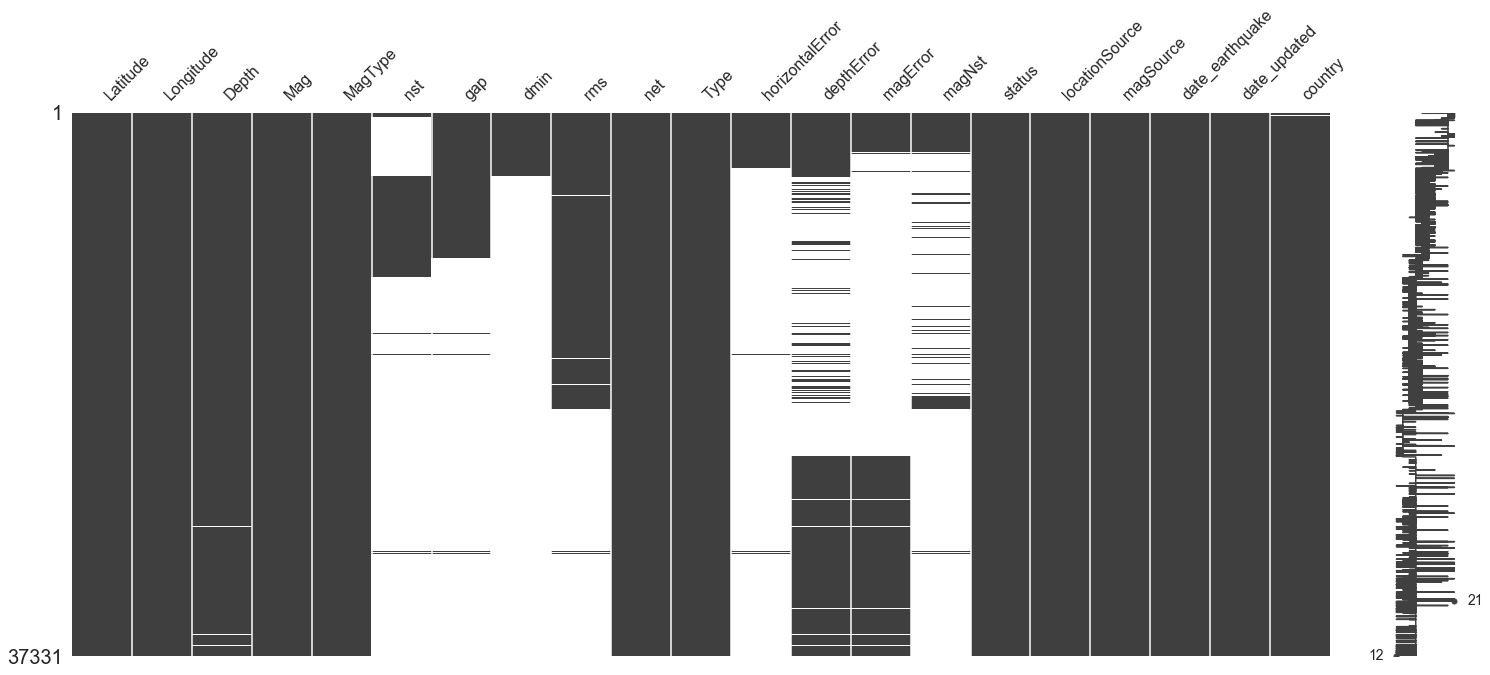

In [41]:
# Gráfico de patrones de correlación de missings ordenados por índice
msno.matrix(df.sort_index())

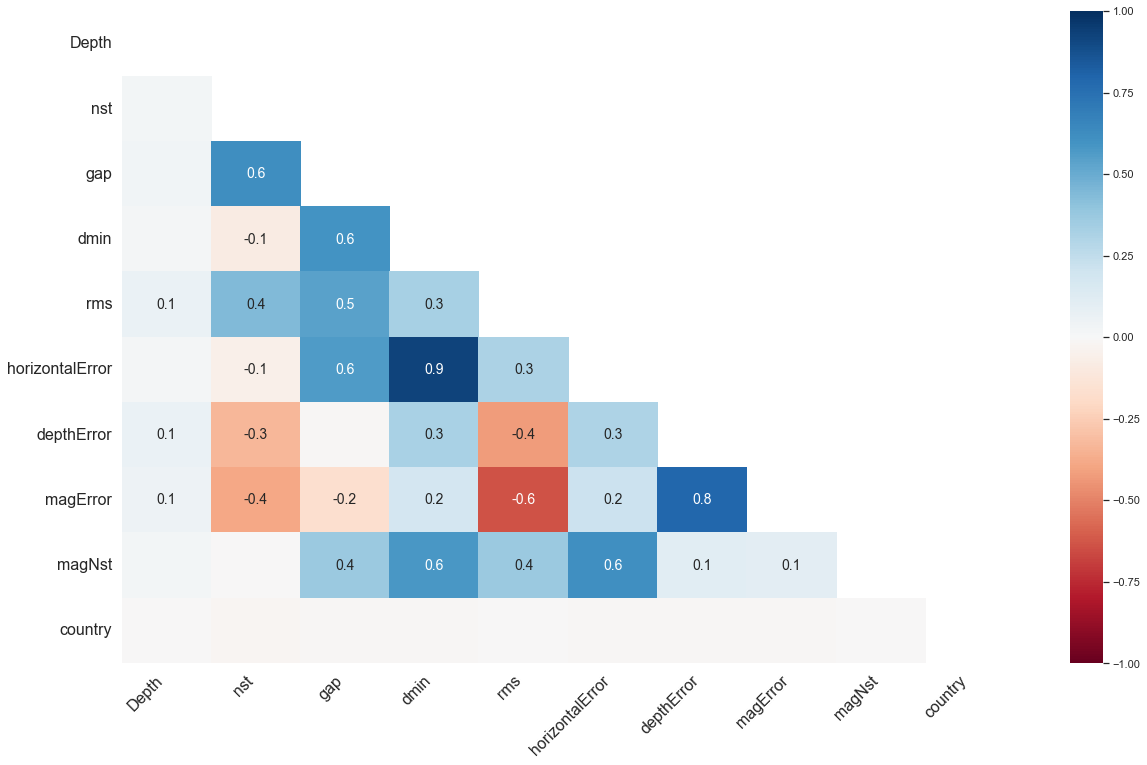

In [42]:
# Gráfico heatmap para comprobar niveles de correlación de missings entre variables
msno.heatmap(df)

In [43]:
# Cálculo del porcentaje de los valores nulos.
ms_pct = df_winsor.isna().sum()/len(df)*100
ms_pct

MagType             0.000000
net                 0.000000
Type                0.000000
status              0.000000
locationSource      0.000000
magSource           0.000000
date_earthquake     0.000000
date_updated        0.000000
country             0.760762
Latitude            0.000000
Longitude           0.000000
Depth               0.358951
Mag                 0.000000
nst                79.981785
gap                72.979561
dmin               88.226943
rms                45.843937
horizontalError    89.365407
depthError         44.209906
magError           55.664193
magNst             85.609815
dtype: float64

In [44]:
# Elimino las variables que tienen demasiados datos missing como para poder imputar sus valores
df_winsor.drop(columns=['nst', 'gap', 'dmin', 'horizontalError', 'magError', 'magNst', 'rms', 'depthError'], inplace = True)

In [53]:
# Separo entre categóricas y numéricas para así poder realizar imputaciones
input_cont = df_winsor.select_dtypes(include=np.number)
input_cat = df_winsor.select_dtypes(exclude=np.number)

In [46]:
# Defino el imputador KNN para los 3 vecinos más próximos. La utilizaré con las variables numéricas. 
imputer_knn = skl_imp.KNNImputer(n_neighbors=3)

In [50]:
# Aplicamos método de imputación de los knn vecinos más próximos para la variable Depth
input_knn = pd.DataFrame(imputer_knn.fit_transform(imput_cont),columns=imput_cont.columns)

In [48]:
from geopy.geocoders import Nominatim

# He intentado utilizar la API de Geopy para imputar los valores nulos a través de las coordenadas. Muchas de las coordenadas, se producen fuera de los límites de los países, en los mares, por lo que la API no devuelve
# todos los valores. 
from geopy.point import Point

geolocator = Nominatim(user_agent="thesis_earthquake")

for index, row in df_winsor.iterrows():
    if pd.isna(row['country']):
        lat = row['Latitude']
        lon = row['Longitude']

        # Check if both latitude and longitude are not NaN
        if not (pd.isna(lat) or pd.isna(lon)):
            # Create a Point object from the latitude and longitude
            location = Point(lat, lon)

            # Perform reverse geocoding
            localizacion = geolocator.reverse(location, exactly_one=True)

            # Check if localizacion is not None
            if localizacion is not None:
                # Update the 'country' column with the country name
                df_winsor.at[index, 'country'] = localizacion.raw['address']['country']
            else:
                # Handle cases where reverse geocoding doesn't return a valid result
                df_winsor.at[index, 'country'] = 'Unknown'
        else:
            # Handle cases where latitude or longitude is NaN
            df_winsor.at[index, 'country'] = 'Unknown'

In [57]:
# Finalmente, he optado por eliminar la variable 'country' al no poder imputar los missings y tener ya información de la localización a través de la latitud y longitud

input_cat.drop(columns = 'country', inplace=True)

In [60]:
df_clean = input_knn.join(input_cat)

In [61]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37331 entries, 0 to 37330
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Latitude         37331 non-null  float64       
 1   Longitude        37331 non-null  float64       
 2   Depth            37331 non-null  float64       
 3   Mag              37331 non-null  float64       
 4   MagType          37331 non-null  category      
 5   net              37331 non-null  category      
 6   Type             37331 non-null  category      
 7   status           37331 non-null  category      
 8   locationSource   37331 non-null  object        
 9   magSource        37331 non-null  object        
 10  date_earthquake  37331 non-null  datetime64[ns]
 11  date_updated     37331 non-null  datetime64[ns]
dtypes: category(4), datetime64[ns](2), float64(4), object(2)
memory usage: 2.4+ MB


In [62]:
df_clean.to_csv('df_clean.csv')